# **포털사이트 크롤링**

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

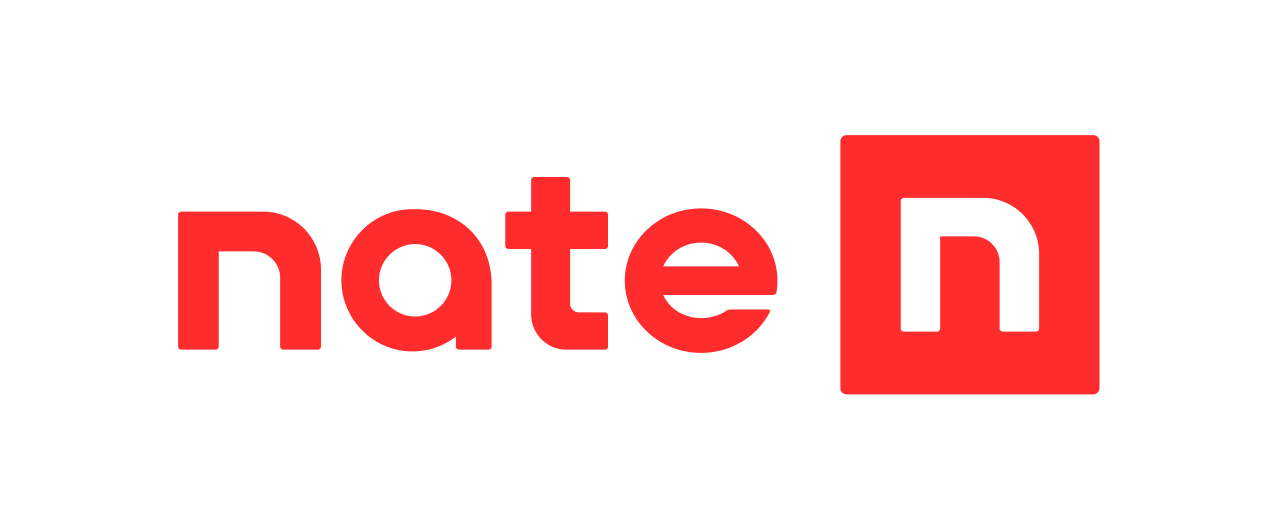

## **네이트 사이트의 메뉴 추출**

### **🔸 메뉴명과 연결 url을 추출**

In [1]:
import pandas as pd
import bs4
import requests
from urllib.request import urlopen

In [4]:
# url 정의
url = 'https://www.nate.com'

In [5]:
# response 객체 얻어오기
html = urlopen(url)
html

In [6]:
# 전달된 소스코드만 추출하기 
html_text = html.read()

In [8]:
# binary code 형태로 되어있는 소스코드 -> bs4 객체로 변환
bs_obj = bs4.BeautifulSoup(html_text, 'html.parser')

In [12]:
# 확인
print(bs_obj.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="//www.nate.com/" name="msapplication-starturl"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="" name="nate:title"/>
  <meta content="네이트 이슈UP" name="nate:description"/>
  <meta content="네이트 홈" name="nate:site_name"/>
  <meta content="https://www.nate.com/" name="nate:url"/>
  <meta content="" name="nate:image"/>
  <meta content="새로워진 nate에서 당신의 오늘을 만나보세요" name="description"/>
  <meta content="한눈에 보는 오늘 : 네이트" property="og:title"/>
  <meta content="https://www.nate.com/" property="og:url"/>
  <meta content="https://main.nateimg.co.kr/img/v7/OpenGraphTag_nate_240x240.png" property="og:image"/>
  <meta content="새로워진 nate에서 당신의 오늘을 만나보세요" property="og:description"/>
  <title>
   한눈에 보는 오늘 : 네이트
  </title>
  <link href="/css/common.min.css?v=202309201110_01" rel="stylesheet" type="text/css"/>
  <link href="//main.nateimg.co.kr/img/v7/f

In [13]:
# 네이트 사이트의 메뉴 Selector 확인
# #divGnb

In [18]:
# 메뉴 Selector 변수로 저장해두기
menu = bs_obj.find('div', {'id':'divGnb'})
menu_li = menu.select('li')
menu_li

[<li class="mail"><a href="https://mail3.nate.com/#index" onmousedown="nc('NGB01');">메일</a></li>,
 <li class="news"><a href="//news.nate.com/" onmousedown="nc('NEV31');">뉴스</a></li>,
 <li class="pann"><a href="https://pann.nate.com/" onmousedown="nc('NGB02');">판</a></li>,
 <li class="chat1"><a href="https://m.nate.com/aichat.html" onmousedown="nc('NGB51');" target="_blank">AI챗</a><em class="beta">beta</em></li>,
 <li class="tv"><a href="https://tv.nate.com/" onmousedown="nc('NGB43');">TV</a></li>,
 <li class="comics"><a href="https://toonnbook.nate.com/" onmousedown="nc('NGB44');">툰앤북</a></li>,
 <li class="fortune"><a href="https://fortune.nate.com/home/main.nate" onmousedown="nc('NGB05');">운세</a></li>,
 <li class="game"><a href="http://game.nate.com/" onmousedown="nc('NGB06');">게임</a></li>,
 <li class="shopping"><a href="//shopping.nate.com/" onmousedown="nc('NGB17');">쇼핑</a></li>,
 <li class="teamroom"><a href="https://nateonweb.nate.com/teamroom/" onmousedown="nc('NGB42');" title="함

In [19]:
# 소스코드 구조 보기
menu_li[0]
menu_li[0].text
menu_li[0].a
menu_li[0].a['href']

<li class="mail"><a href="https://mail3.nate.com/#index" onmousedown="nc('NGB01');">메일</a></li>

'메일'

<a href="https://mail3.nate.com/#index" onmousedown="nc('NGB01');">메일</a>

'https://mail3.nate.com/#index'

In [20]:
# 메뉴명과 링크 뽑는 코드 확인하기
for li in menu_li:
    print(li.text, li.a['href'])

# Action List
## 중복이 되는 메뉴는 제외 (더보기 내에 중복되어 있음)
## href 가 없는 메뉴는 제외
## 'javascript' 태그명 제외 

메일 https://mail3.nate.com/#index
뉴스 //news.nate.com/
판 https://pann.nate.com/
AI챗beta https://m.nate.com/aichat.html
TV https://tv.nate.com/
툰앤북 https://toonnbook.nate.com/
운세 https://fortune.nate.com/home/main.nate
게임 http://game.nate.com/
쇼핑 //shopping.nate.com/
팀룸 https://nateonweb.nate.com/teamroom/
네이트뷰 https://view.nate.com/

더보기


뉴스
날씨
스포츠
연예
아이돌24
랭킹뉴스


판
톡톡
판포토
팬톡


네이트온
네이트캐쉬
문자메시지
주소록


컬러링
이슈UP추천

서비스 전체보기
더보기 닫기

 javascript:;
뉴스 //news.nate.com
날씨 //news.nate.com/Weather
스포츠 //sports.news.nate.com/
연예 //news.nate.com/ent/index
아이돌24 //news.nate.com/ent/idol24
랭킹뉴스 //news.nate.com/rank/interest
판 https://pann.nate.com/
톡톡 https://pann.nate.com/talk
판포토 https://pann.nate.com/talk/imageTheme/index
팬톡 https://pann.nate.com/fantalk
네이트온 //nateonweb.nate.com/
네이트캐쉬 //cash.nate.com/center/cashMain.sc
문자메시지 https://sms.nate.com/
주소록 https://mail.nate.com/pims/
컬러링 //mobile.nate.com/
이슈UP추천 //editor.nate.com/


### **🔸 메뉴명과 링크 DF 만들기**
- 빈 df를 생성 후, df에 data를 행으로 추가
- 각각의 행을 df로 생성 후, concat 함수로 결합

In [21]:
# 빈 df 생성
nate_menu = pd.DataFrame({'메뉴':[], '링크':[]})
nate_menu

,메뉴,링크


In [24]:
# 메뉴명과 링크 뽑기
# Action List
## 중복이 되는 메뉴는 제외 (더보기 내에 중복되어 있음)
## href 가 없는 메뉴는 제외
## 'javascript' 태그명 제외

index = 0
for li in menu_li:
    menu_text = li.text
    menu_link = li.a['href']
    if menu_text in nate_menu['메뉴'].values or menu_link == '' or menu_link == 'javascript:;':
        continue
    temp = pd.DataFrame({'메뉴':menu_text, '링크':menu_link}, index=[index])
    nate_menu = pd.concat([nate_menu, temp])
    index = index + 1
nate_menu

,메뉴,링크
0,메일,https://mail3.nate.com/#index
1,뉴스,//news.nate.com/
2,판,https://pann.nate.com/
3,AI챗beta,https://m.nate.com/aichat.html
4,TV,https://tv.nate.com/
5,툰앤북,https://toonnbook.nate.com/
6,운세,https://fortune.nate.com/home/main.nate
7,게임,http://game.nate.com/
8,쇼핑,//shopping.nate.com/
9,팀룸,https://nateonweb.nate.com/teamroom/


### **🔸 수집 데이터 저장**
- DataLake에 rawdata 그대로 저장
- 저장 공간은 crawl_data 공간에 저장

In [25]:
# 저장공간 존재 여부 확인 후 없으면 생성
import os

if not os.path.exists('crawl_data'):
    os.makedirs('crawl_data')

In [26]:
# 파일 저장
nate_menu.to_csv('./crawl_data/nate_menu.csv')

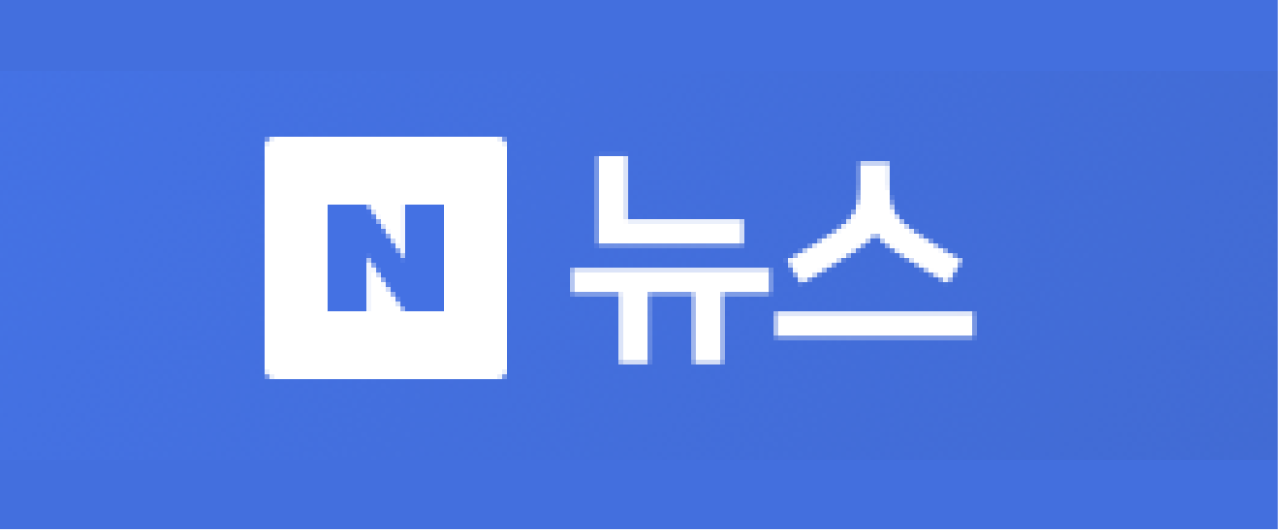

## **네이버 뉴스 크롤링**
- 네이버 뉴스는 네이버 정책에 따라 모든 언론사들의 뉴스가 랜덤하게 배치됨
- 헤드라인 뉴스는 표면적으로는 제공되지 않는다
- 네이버 메인 페이지는 upgrade 정책에 따라 동적구성되는 경우가 있기 때문에, **셀레니움**을 사용해야 함
- sub 페이지는 정적구성 이므로 sub인 news로 바로 접근 

### **🔸 네이버 뉴스 메뉴 추출**

In [37]:
# 소스코드 받아오기 및 bs4 객체로 저장
url = 'https://news.naver.com'
html = urlopen(url)
html_text = html.read()
bs_obj = bs4.BeautifulSoup(html_text, 'html.parser')
print(bs_obj.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <title id="browserTitleArea">
   네이버 뉴스
  </title>
  <script>
   function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
  </script>
  <script>
   (function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
  </script>
  <script>
   var g_ssc = 'news.v3_media' || null;
  </script>
  <meta charset="utf-8"/>
  <meta content="width=device-width,

In [39]:
# 네이버 사이트의 메뉴 Selector 확인
bs_obj.select('body > section > header > div.Nlnb._float_lnb > div')

[<div class="Nlnb_inner">
 <div class="Nlnb_both">
 <div class="Nlnb_left _lnb_scroll">
 <div class="Nlnb_menu Ntype_scroll">
 <div class="Nlnb_menu_inner _scroll">
 <ul class="Nlnb_menu_list" role="menu">
 <li class="Nlist_item is_active"><a aria-selected="true" class="Nitem_link" href="https://news.naver.com/?viewType=pc" onclick="nclk(event,'lnb.pcmedia','','');" role="menuitem"><span class="Nitem_link_menu">언론사별</span></a></li>
 <li class="Nlist_item"><a aria-selected="false" class="Nitem_link" href="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=100" onclick="nclk(event,'lnb.pol','','');" role="menuitem"><span class="Nitem_link_menu">정치</span></a></li>
 <li class="Nlist_item"><a aria-selected="false" class="Nitem_link" href="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=101" onclick="nclk(event,'lnb.eco','','');" role="menuitem"><span class="Nitem_link_menu">경제</span></a></li>
 <li class="Nlist_item"><a aria-selected="false" class="Nite

In [49]:
# ul 태그 추출 
ul = bs_obj.find('ul', {'class':'Nlnb_menu_list'})
ul

<ul class="Nlnb_menu_list" role="menu">
<li class="Nlist_item is_active"><a aria-selected="true" class="Nitem_link" href="https://news.naver.com/?viewType=pc" onclick="nclk(event,'lnb.pcmedia','','');" role="menuitem"><span class="Nitem_link_menu">언론사별</span></a></li>
<li class="Nlist_item"><a aria-selected="false" class="Nitem_link" href="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=100" onclick="nclk(event,'lnb.pol','','');" role="menuitem"><span class="Nitem_link_menu">정치</span></a></li>
<li class="Nlist_item"><a aria-selected="false" class="Nitem_link" href="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=101" onclick="nclk(event,'lnb.eco','','');" role="menuitem"><span class="Nitem_link_menu">경제</span></a></li>
<li class="Nlist_item"><a aria-selected="false" class="Nitem_link" href="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=102" onclick="nclk(event,'lnb.soc','','');" role="menuitem"><span class="Nitem_link_men

In [83]:
# li 태그 추출
lis = ul.findAll('li')
print(len(lis))
print(lis)
print(type(lis))

14
[<li class="Nlist_item is_active"><a aria-selected="true" class="Nitem_link" href="https://news.naver.com/?viewType=pc" onclick="nclk(event,'lnb.pcmedia','','');" role="menuitem"><span class="Nitem_link_menu">언론사별</span></a></li>, <li class="Nlist_item"><a aria-selected="false" class="Nitem_link" href="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=100" onclick="nclk(event,'lnb.pol','','');" role="menuitem"><span class="Nitem_link_menu">정치</span></a></li>, <li class="Nlist_item"><a aria-selected="false" class="Nitem_link" href="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=101" onclick="nclk(event,'lnb.eco','','');" role="menuitem"><span class="Nitem_link_menu">경제</span></a></li>, <li class="Nlist_item"><a aria-selected="false" class="Nitem_link" href="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=102" onclick="nclk(event,'lnb.soc','','');" role="menuitem"><span class="Nitem_link_menu">사회</span></a></li>, <li class=

In [54]:
# a태그, text (링크, 메뉴명) 추출하기 위해 확인
for li in lis:
    a_tag = li.find('a')
    print(a_tag.text, " : ", a_tag['href'])

# 별다른 문제 없이 잘 들어가 있는 것이 확인됨 

언론사별  :  https://news.naver.com/?viewType=pc
정치  :  https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100
경제  :  https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=101
사회  :  https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102
생활/문화  :  https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=103
IT/과학  :  https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105
세계  :  https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=104
랭킹  :  https://news.naver.com/main/ranking/popularDay.naver
신문보기  :  https://news.naver.com/newspaper/home?viewType=pc
오피니언  :  https://news.naver.com/opinion/home
TV  :  https://news.naver.com/main/tv/index.naver?mid=tvh
팩트체크  :  https://news.naver.com/factcheck/main
알고리즘 안내  :  https://media.naver.com/algorithm
정정보도 모음  :  https://news.naver.com/main/ombudsman/errorArticleList.naver?mid=omb


In [57]:
# 메뉴 df 생성
# 위 네이터와 다르게, 데이터가 잘 뽑혔기 때문에 리스트에 각 컬럼 데이터를 모은 후 df 로 구성 

section = []
link = []
for li in lis:
    a_tag = li.find('a')
    section.append(a_tag.text)
    link.append(a_tag['href'])

col_dict = {'메뉴':section, '링크':link}
naver_news_menu = pd.DataFrame(col_dict)
naver_news_menu

,메뉴,링크
0,언론사별,https://news.naver.com/?viewType=pc
1,정치,https://news.naver.com/main/main.naver?mode=LS...
2,경제,https://news.naver.com/main/main.naver?mode=LS...
3,사회,https://news.naver.com/main/main.naver?mode=LS...
4,생활/문화,https://news.naver.com/main/main.naver?mode=LS...
5,IT/과학,https://news.naver.com/main/main.naver?mode=LS...
6,세계,https://news.naver.com/main/main.naver?mode=LS...
7,랭킹,https://news.naver.com/main/ranking/popularDay...
8,신문보기,https://news.naver.com/newspaper/home?viewType=pc
9,오피니언,https://news.naver.com/opinion/home


In [58]:
# DataLake 에 저장
naver_news_menu.to_csv('./crawl_data/naver_news_menu.csv')

### **🔸 언론사별 section의 첫번째 언론사 뉴스 크롤링**
- 기사 타이틀과 기사 요약 언론사명 기고날짜를 추출해서 출력하는 코드 작성
- 네이버 뉴스 소스코드 받아오는 코드부터 작성

In [158]:
# 소스코드 받아오기 및 bs4 객체로 저장
url = "https://news.naver.com/?viewType=pc"
html = urlopen(url)
html_text = html.read()
bs_obj = bs4.BeautifulSoup(html_text, 'html.parser')


# Selector 확인
# bs_obj.select('#ct > div > section.main_content > div.main_brick > div > div:nth-child(1) > div.main_brick_item._channel_news_preview_wrapper')


# 첫번째 언론사 Selector 추출
cjs = bs_obj.find('div', {'class':'cjs_channel_card'})


# 첫번째 기사 추출
## 한 기사가 개별 div로 묶여있지 않고,  title, contents 구분되어 있음 
cjs_1_title = cjs.find('div', {'class':'cjs_ctitle _item_title'})
cjs_1_contents = cjs.find('div', {'class':'cjs_journal_wrap _item_contents'})


# 첫번째 기사 항목 추출
## 기고날짜 (cjs_1_title)
datetime = cjs_1_title.find('span', {'class':'datetime'}).text
## 언론사명 (cjs_1_title)
h4 = cjs_1_title.find('h4', {'class':'channel'})
channel = []
for h in h4:
    span = h4.find('span', {'class':'datetime'})
    if h != span:
        channel.append(h)
## 기사 타이틀 (cjs_1_contents) 
title = cjs_1_contents.find('div', {'class':'cjs_t'}).text
## 기사 요약 (cjs_1_contents) 
summary = cjs_1_contents.find('p', {'class':'cjs_d'}).text
### dict 로 저장
col_dict = {'기사 타이틀':title,
            '기사 요약':summary,
           '언론사':channel,
           '기고 날짜':datetime}

# 결과
col_dict

{'기사 타이틀': '[르포]전용 44㎡가 11억원? 발산역 초역세권이라지만…',
 '기사 요약': "지난 6일 오전, 서울지하철 5호선 발산역 7번 출구로 나와 정확히 58초를 걷자 '삼익 더 랩소디' 현장 입구에 닿았다. 대로변에 우뚝 솟은 '나홀로 아파트'다. 후분양 아파트라 공사가 거의 마무리된 상태다. 아파",
 '언론사': ['비즈워치'],
 '기고 날짜': '12월 08일 18:47'}